macro parameters: learning_rate=0.005, momentum=0.0


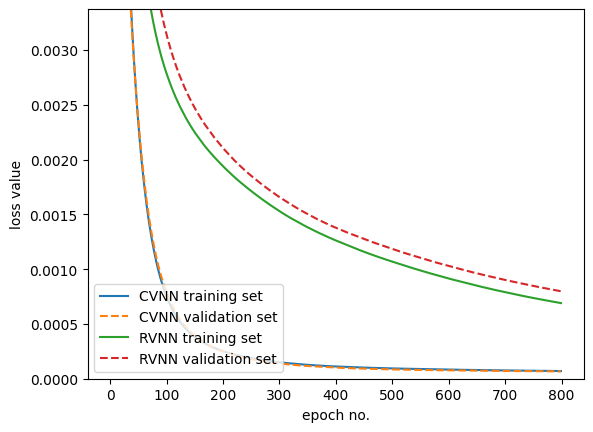

macro parameters: learning_rate=0.005, momentum=0.01


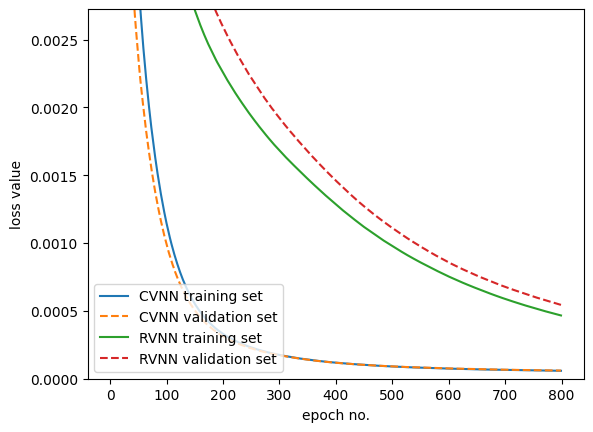

macro parameters: learning_rate=0.005, momentum=0.05


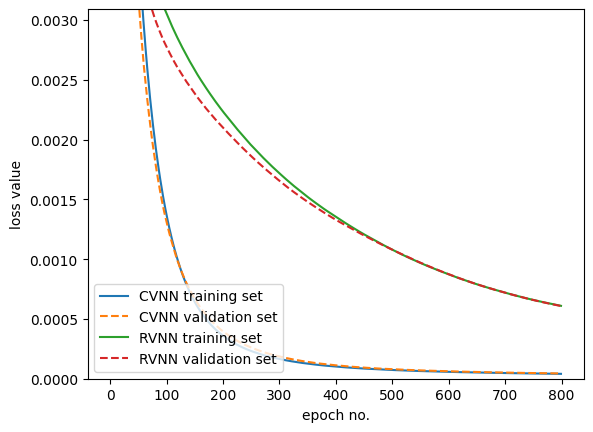

macro parameters: learning_rate=0.005, momentum=0.2


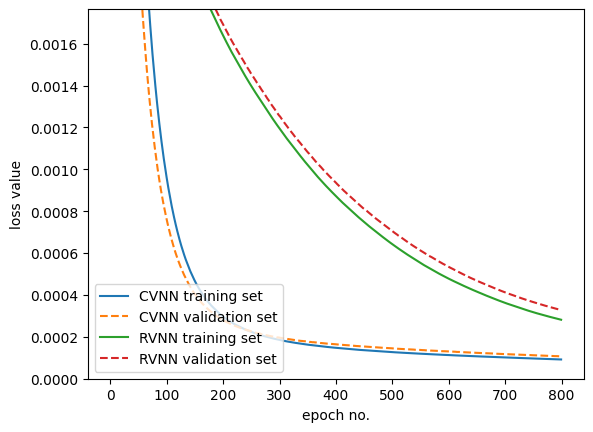

macro parameters: learning_rate=0.01, momentum=0.0


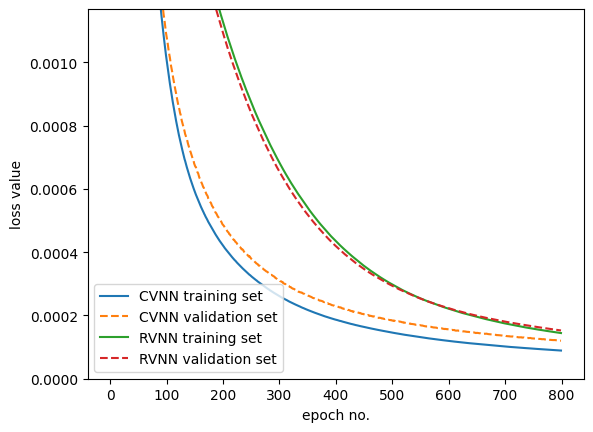

macro parameters: learning_rate=0.01, momentum=0.01


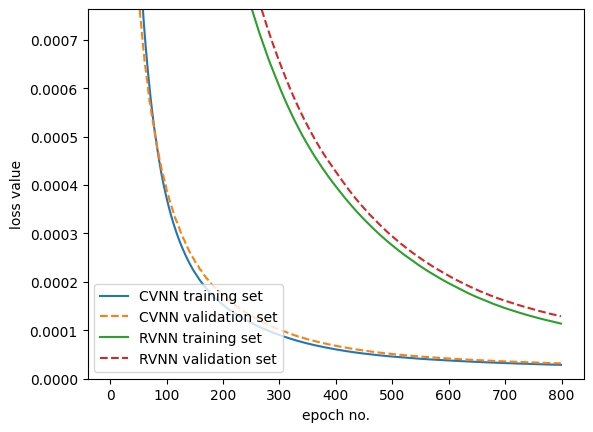

macro parameters: learning_rate=0.01, momentum=0.05


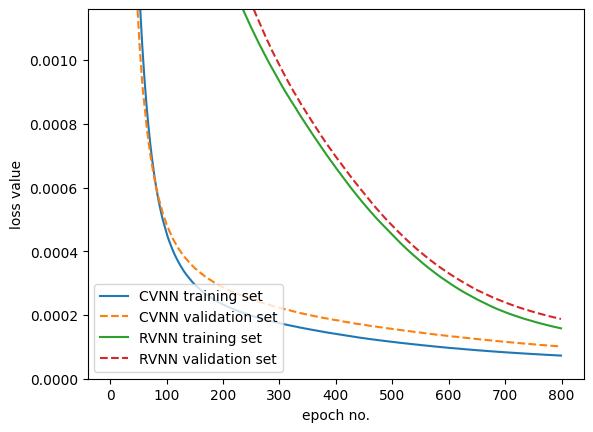

macro parameters: learning_rate=0.01, momentum=0.2


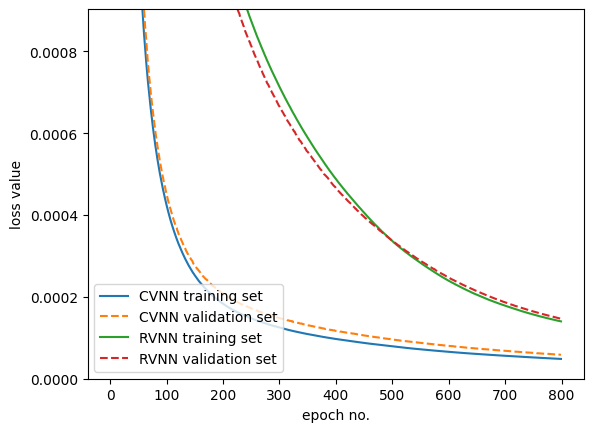

macro parameters: learning_rate=0.02, momentum=0.0


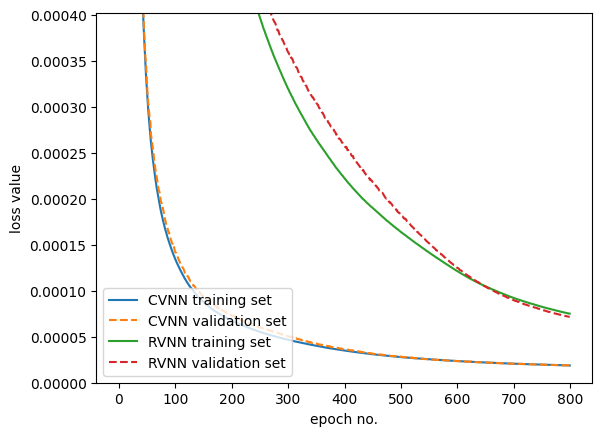

macro parameters: learning_rate=0.02, momentum=0.01


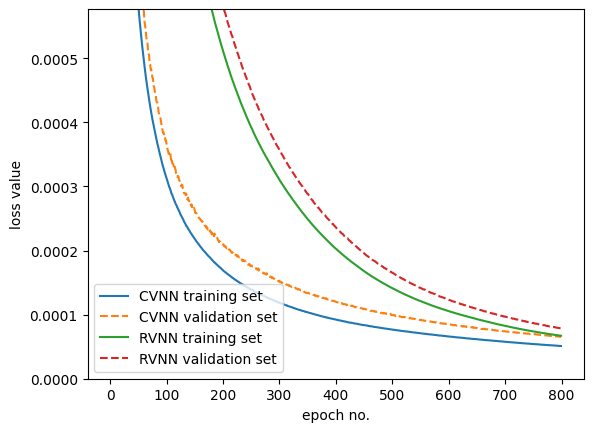

macro parameters: learning_rate=0.02, momentum=0.05


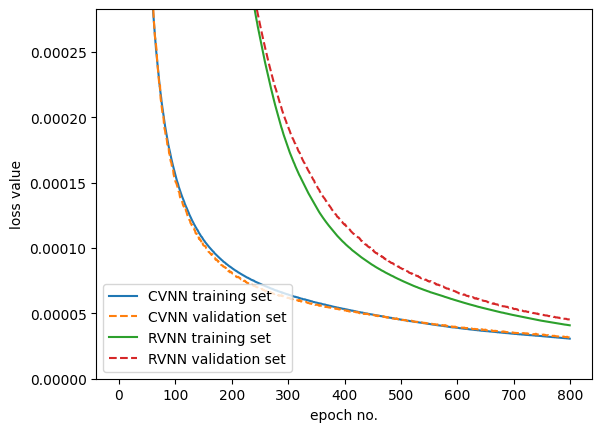

macro parameters: learning_rate=0.02, momentum=0.2


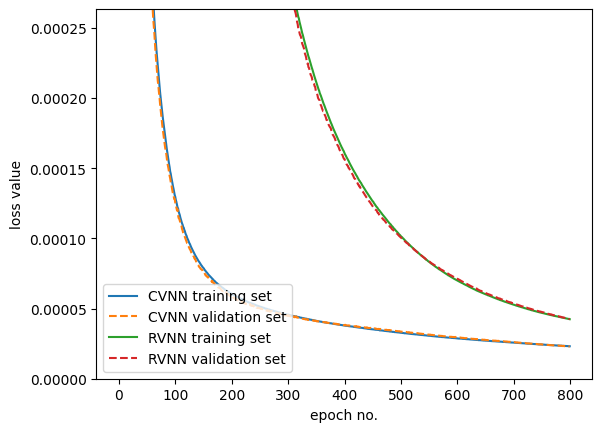

In [ ]:
learning_rate_list = [0.005, 0.01, 0.02]
momentum_list = [0., 0.01, 0.05, 0.2]

for learning_rate in learning_rate_list:
    for momentum in momentum_list:
        OPTIMIZER = lambda: SGD(jit_compile=True, learning_rate=learning_rate, momentum=momentum)
        
        rvnn_model = make_rvnn_model()
        rvnn_model.compile(loss=MeanSquaredError(), optimizer=OPTIMIZER())
        rvnn_history = rvnn_model.fit(rvnn_input, rvnn_output, epochs=EPOCH_NUM, validation_split=VAL_RATIO, verbose=VERBOSE_LVL)
        
        cvnn_model = make_cvnn_model()
        cvnn_model.compile(loss=ComplexMeanSquareError(), optimizer=OPTIMIZER())
        cvnn_history = cvnn_model.fit(np.array(data), expected_output, epochs=EPOCH_NUM, validation_split=VAL_RATIO, verbose=VERBOSE_LVL)
        
        print(f'macro parameters: learning_rate={learning_rate}, momentum={momentum}')
        plot_loss_history_comparision(rvnn_history, cvnn_history, 2)